In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#2
# URL to the Wheat Seeds Dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

# Read the dataset from the URL using Pandas
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

# Display the first few rows of the DataFrame to verify the data is loaded correctly
print(df.head())
# Select specific columns (Area, Perimeter, Compactness, and Class)
selected_columns = ['Area', 'Perimeter', 'Compactness', 'Class']
selected_data = df[selected_columns]

# Convert the selected data to a NumPy array
numpy_array = selected_data.to_numpy()

# Display the first few rows of the NumPy array
print(numpy_array[:5])


    Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry coefficient  Length of kernel groove  Class  
0                  2.221                    5.220      1  
1                  1.018                    4.956      1  
2                  2.699                    4.825      1  
3                  2.259                    4.805      1  
4                  1.355                    5.175      1  
[[15.26   14.84    0.871   1.    ]
 [14.88   14.57    0.8811  1.    ]
 [14.29   14.09    0.905   1.    ]
 [13.84   13.94    0.8955  1.    ]
 [16.14   14.99    0.9034  1.    ]]


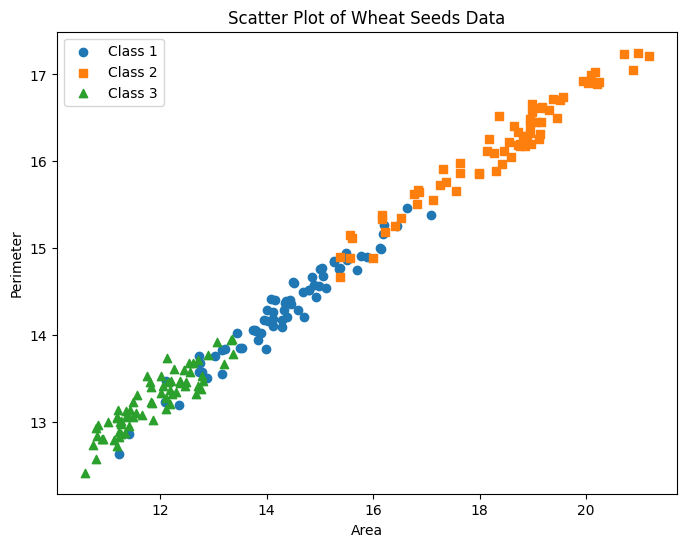

In [2]:
#3
# Create a dictionary to map class labels to shapes
class_to_shape = {
    1: 'o',  # Circle
    2: 's',  # Square
    3: '^',  # Triangle
}

# Create a scatter plot
plt.figure(figsize=(8, 6))

for class_label, shape in class_to_shape.items():
    # Filter data for the current class
    class_data = numpy_array[numpy_array[:, -1] == class_label]

    # Extract Area and Perimeter columns
    area = class_data[:, 0]
    perimeter = class_data[:, 1]

    # Plot data points with the specified shape
    plt.scatter(area, perimeter, marker=shape, label=f'Class {class_label}')

# Add labels and a legend
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Scatter Plot of Wheat Seeds Data')
plt.legend()

# Show the plot
plt.show()

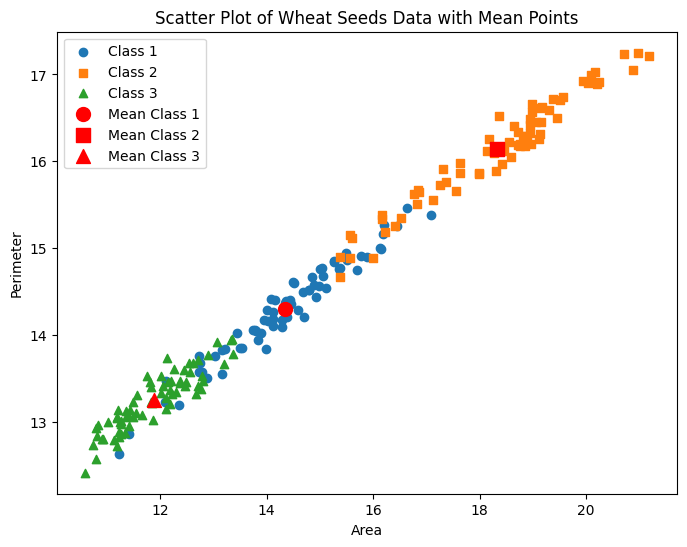

In [3]:
#4
# Create a scatter plot
plt.figure(figsize=(8, 6))

# Create empty arrays to store mean points and labels
mean_points = []
mean_labels = []

for class_label, shape in class_to_shape.items():
    # Filter data for the current class
    class_data = numpy_array[numpy_array[:, -1] == class_label]

    # Extract Area and Perimeter columns
    area = class_data[:, 0]
    perimeter = class_data[:, 1]

    # Plot data points with the specified shape
    plt.scatter(area, perimeter, marker=shape, label=f'Class {class_label}')

    # Calculate the mean for the current class
    mean_point = np.mean(class_data, axis=0)
    mean_points.append(mean_point)
    mean_labels.append(f'Mean Class {class_label}')

# Convert the lists of mean points and labels to NumPy arrays
mean_points = np.array(mean_points)

# Plot mean points with larger size and the same shape
for i, shape in enumerate(class_to_shape.values()):
    plt.scatter(mean_points[i, 0], mean_points[i, 1], marker=shape, s=100, label=mean_labels[i], color='red')

# Add labels and a legend
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.title('Scatter Plot of Wheat Seeds Data with Mean Points')
plt.legend()

# Show the plot
plt.show()


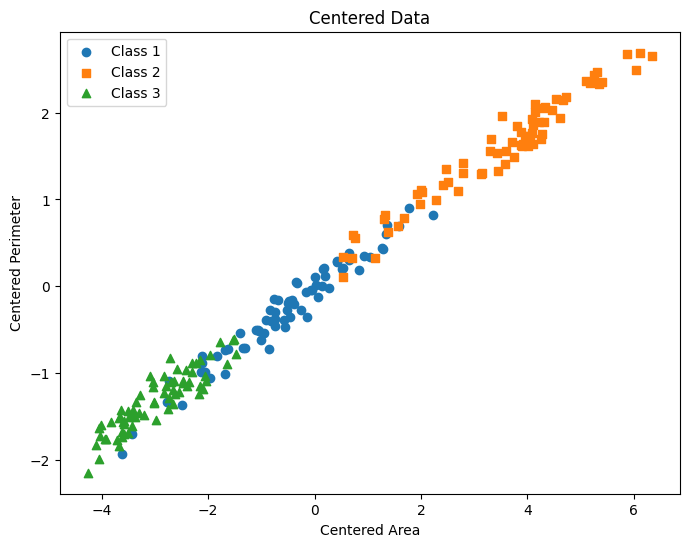

In [4]:
#5
import numpy as np
import matplotlib.pyplot as plt

# Calculate the centered version of Area and Perimeter
centered_area = numpy_array[:, 0] - np.mean(numpy_array[:, 0])
centered_perimeter = numpy_array[:, 1] - np.mean(numpy_array[:, 1])

# Create a new plot for centered data
plt.figure(figsize=(8, 6))

for class_label, shape in class_to_shape.items():
    class_indices = (numpy_array[:, -1] == class_label)
    plt.scatter(centered_area[class_indices], centered_perimeter[class_indices], marker=shape, label=f'Class {class_label}')

# Add labels and a title
plt.xlabel('Centered Area')
plt.ylabel('Centered Perimeter')
plt.title('Centered Data')

# Show the plot
plt.legend()
plt.show()


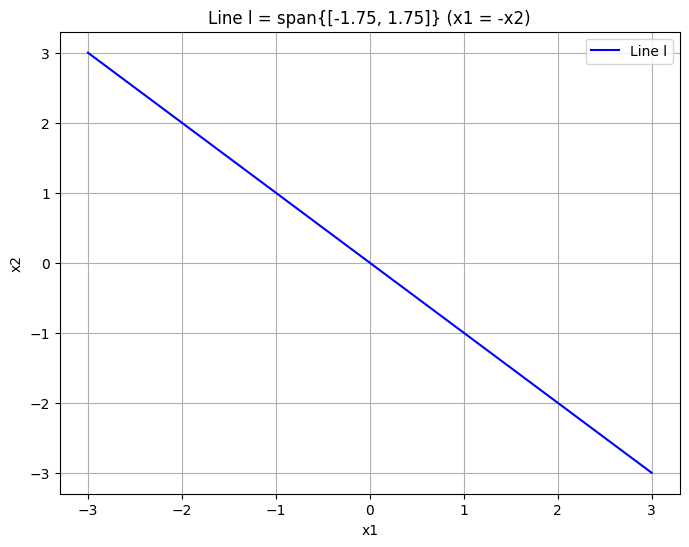

In [5]:
#6
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x1 (e.g., from -3 to 3)
x1 = np.linspace(-3, 3, 100)  # Adjust the range and number of points as needed

# Calculate x2 using the equation x1 = -x2
x2 = -x1

# Create a plot
plt.figure(figsize=(8, 6))

# Plot the line l
plt.plot(x1, x2, label='Line l', color='blue')

# Add labels and a title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Line l = span{[-1.75, 1.75]} (x1 = -x2)')

# Show the plot with a legend
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


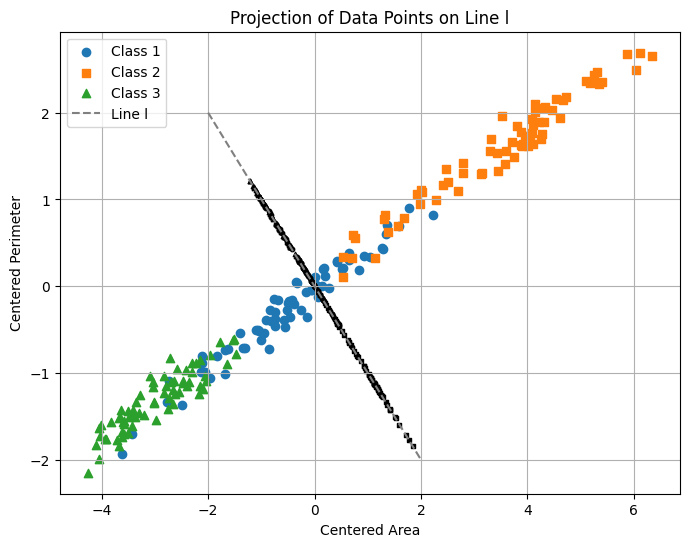

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the centered version of Area and Perimeter
centered_area = numpy_array[:, 0] - np.mean(numpy_array[:, 0])
centered_perimeter = numpy_array[:, 1] - np.mean(numpy_array[:, 1])

# Define the line vector [-1.75 1.75]
line_vector = np.array([-1.75, 1.75])

# Calculate the projection of each data point onto the line
projections = np.dot(np.column_stack((centered_area, centered_perimeter)), line_vector)

# Create an empty list to store the projection vectors
projection_list = []

# Calculate the projection for each data point
for i in range(len(projections)):
    projection = (projections[i] / np.dot(line_vector, line_vector)) * line_vector
    projection_list.append(projection)

# Convert the list of projection vectors to a NumPy array
projections = np.array(projection_list)

# Create a new plot for centered data
plt.figure(figsize=(8, 6))

# Plot centered data points
for class_label, shape in class_to_shape.items():
    class_indices = (numpy_array[:, -1] == class_label)
    plt.scatter(centered_area[class_indices], centered_perimeter[class_indices], marker=shape, label=f'Class {class_label}')

    # Plot the projected points on the line with the same shape but smaller size
    class_projections = projections[class_indices]
    for i in range(len(class_projections)):
        projection = class_projections[i]
        plt.scatter(projection[0], projection[1], marker=shape, s=10, color='black')

# Plot the line l: x1 = -x2
plt.plot([-2, 2], [2, -2], color='gray', linestyle='--', label='Line l')

# Add labels and a title
plt.xlabel('Centered Area')
plt.ylabel('Centered Perimeter')
plt.title('Projection of Data Points on Line l')

# Show the plot with legend
plt.legend()
plt.grid(True)
plt.show()


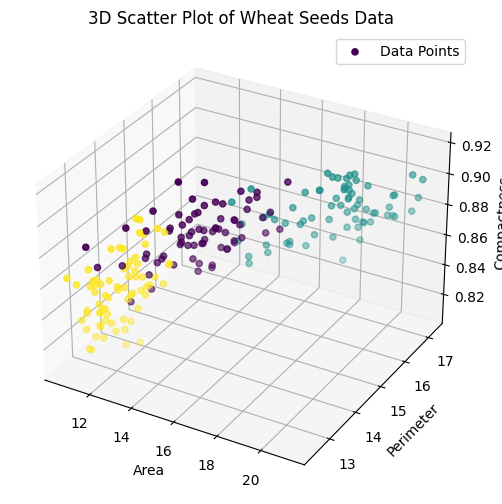

In [7]:
#in 3D
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# URL to the Wheat Seeds Dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

# Read the dataset from the URL using Pandas
column_names = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove', 'Class']
df = pd.read_csv(url, delim_whitespace=True, header=None, names=column_names)

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract the first three dimensions (Area, Perimeter, Compactness)
area = df['Area']
perimeter = df['Perimeter']
compactness = df['Compactness']

# Scatter plot in 3D
ax.scatter(area, perimeter, compactness, c=df['Class'], cmap='viridis', marker='o', label='Data Points')

# Add labels and a title
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')
ax.set_title('3D Scatter Plot of Wheat Seeds Data')

# Show the plot
plt.legend()
plt.show()


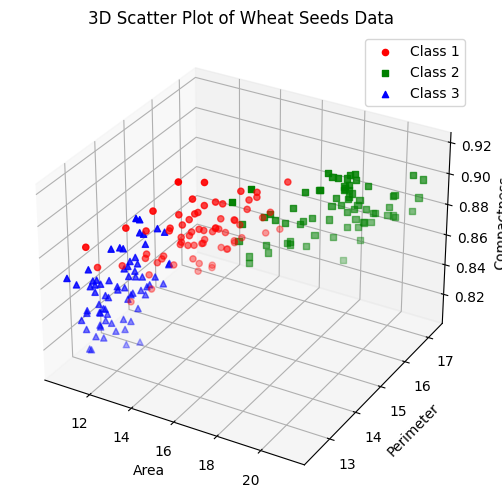

In [8]:
#2
# Create a 3D scatter plot
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract the first three dimensions (Area, Perimeter, Compactness)
area = df['Area']
perimeter = df['Perimeter']
compactness = df['Compactness']
class_labels = df['Class']

# Define shapes and colors for different classes
class_shapes = {1: 'o', 2: 's', 3: '^'}
class_colors = {1: 'red', 2: 'green', 3: 'blue'}

# Scatter plot in 3D with different shapes and colors for classes
for class_label in class_labels.unique():
    indices = class_labels[class_labels == class_label].index
    ax.scatter(area[indices], perimeter[indices], compactness[indices],
               c=class_colors[class_label], marker=class_shapes[class_label],
               label=f'Class {class_label}')

# Add labels and a title
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')
ax.set_title('3D Scatter Plot of Wheat Seeds Data')

# Show the plot with legend
plt.legend()
plt.show()

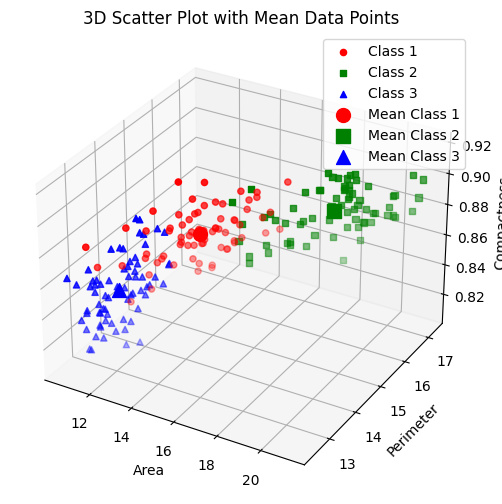

In [9]:
#3
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract the first three dimensions (Area, Perimeter, Compactness)
area = df['Area']
perimeter = df['Perimeter']
compactness = df['Compactness']
class_labels = df['Class']

# Define shapes and colors for different classes
class_shapes = {1: 'o', 2: 's', 3: '^'}
class_colors = {1: 'red', 2: 'green', 3: 'blue'}

# Calculate the mean data points
mean_points = []

for class_label in class_labels.unique():
    indices = class_labels[class_labels == class_label].index
    class_area = area[indices]
    class_perimeter = perimeter[indices]
    class_compactness = compactness[indices]

    mean_point = np.mean(class_area), np.mean(class_perimeter), np.mean(class_compactness)
    mean_points.append(mean_point)

for class_label in class_labels.unique():
    indices = class_labels[class_labels == class_label].index
    ax.scatter(area[indices], perimeter[indices], compactness[indices],
               c=class_colors[class_label], marker=class_shapes[class_label],
               label=f'Class {class_label}')


# Plot the mean data points with larger size
for class_label, shape in class_shapes.items():
    mean_point = mean_points[class_label - 1]  # class_label starts from 1
    ax.scatter(mean_point[0], mean_point[1], mean_point[2], c=class_colors[class_label],
               marker=shape, s=100, label=f'Mean Class {class_label}')

# Add labels and a title
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Compactness')
ax.set_title('3D Scatter Plot with Mean Data Points')

# Show the plot with legend
plt.legend()
plt.show()

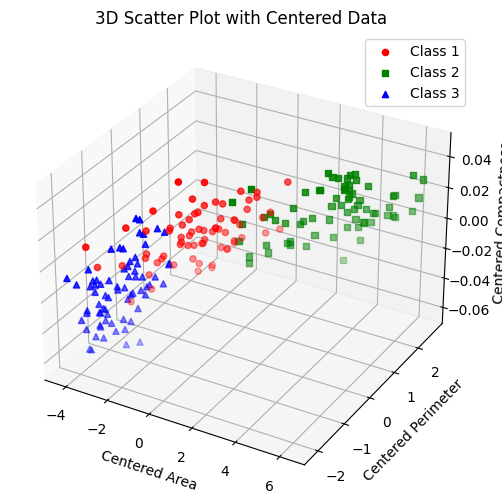

In [10]:
#4
# Calculate the centered version of Area, Perimeter, and Compactness
centered_area = area - area.mean()
centered_perimeter = perimeter - perimeter.mean()
centered_compactness = compactness - compactness.mean()

# Create a new 3D scatter plot for centered data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the centered data points with different shapes and colors based on class
for class_label, shape in class_shapes.items():
    indices = class_labels[class_labels == class_label].index
    class_centered_area = centered_area[indices]
    class_centered_perimeter = centered_perimeter[indices]
    class_centered_compactness = centered_compactness[indices]

    ax.scatter(class_centered_area, class_centered_perimeter, class_centered_compactness,
               c=class_colors[class_label], marker=shape, label=f'Class {class_label}')

# Add labels and a title
ax.set_xlabel('Centered Area')
ax.set_ylabel('Centered Perimeter')
ax.set_zlabel('Centered Compactness')
ax.set_title('3D Scatter Plot with Centered Data')

# Show the plot with legend
plt.legend()
plt.show()


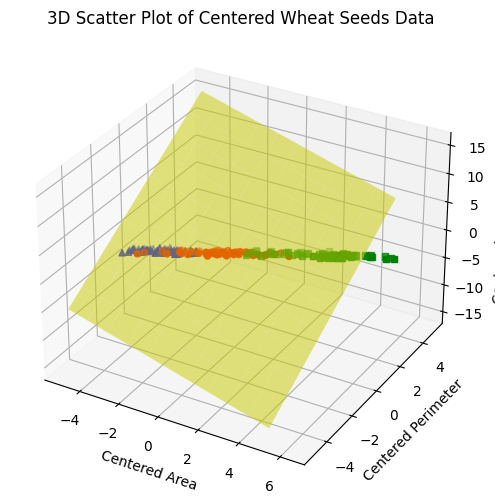

In [12]:
#4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calculate the centered version of 'Area,' 'Perimeter,' and 'Compactness'
centered_area = area - area.mean()
centered_perimeter = perimeter - perimeter.mean()
centered_compactness = compactness - compactness.mean()

# Create a new 3D scatter plot for centered data
fig_centered = plt.figure(figsize=(8, 6))
ax_centered = fig_centered.add_subplot(111, projection='3d')

# Define different shapes and colors for the classes
class_info = class_labels.unique()
class_shapes = ['o', 's', '^']
class_colors = ['red', 'green', 'blue']

# Scatter plot in 3D for centered data with different shapes and colors for classes
for i, class_label in enumerate(class_info):
    indices = class_labels[class_labels == class_label].index
    shape = class_shapes[i]
    color = class_colors[i]
    ax_centered.scatter(centered_area[indices], centered_perimeter[indices], centered_compactness[indices],
                        c=color, marker=shape, label=f'Class {class_label}')

# Add labels and a title
ax_centered.set_xlabel('Centered Area')
ax_centered.set_ylabel('Centered Perimeter')
ax_centered.set_zlabel('Centered Compactness')
ax_centered.set_title('3D Scatter Plot of Centered Wheat Seeds Data')

# Define the plane's normal vectors
normal_vector1 = np.array([1, -2, 1])
normal_vector2 = np.array([2, 1, 0])

# Create a grid for the plane
xx, yy = np.meshgrid(range(-5, 6), range(-5, 6))
zz = (normal_vector1[0] * xx + normal_vector1[1] * yy) / -normal_vector1[2]

# Plot the plane
ax_centered.plot_surface(xx, yy, zz, color='yellow', alpha=0.5)

# Show the plot
plt.show()


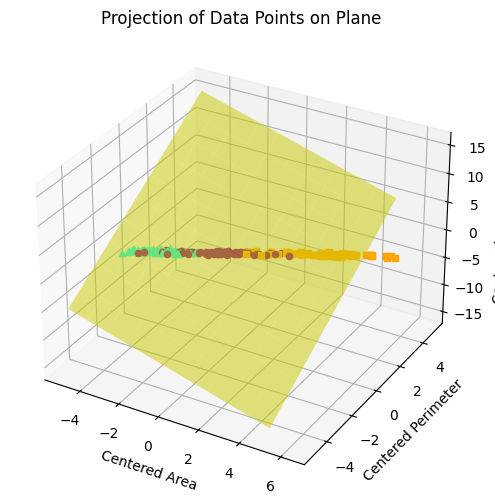

In [13]:
#5
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calculate the projection of each data point onto the plane
projections = []

for i in range(len(centered_area)):
    # Calculate the projection of the centered data point onto the plane
    point = np.array([centered_area[i], centered_perimeter[i], centered_compactness[i]])

    # Calculate the projection using the dot product with the normal vectors
    projection = np.dot(point, normal_vector1) / np.linalg.norm(normal_vector1) ** 2 * normal_vector1 + \
                 np.dot(point, normal_vector2) / np.linalg.norm(normal_vector2) ** 2 * normal_vector2

    projections.append(projection)

# Create a new 3D scatter plot for centered data
fig_centered = plt.figure(figsize=(8, 6))
ax_centered = fig_centered.add_subplot(111, projection='3d')

# Define different shapes for the classes
class_info = class_labels.unique()
class_shapes = ['o', 's', '^']

# Define colors for centered data
centered_colors = ['red', 'green', 'blue']

# Plot the plane
ax_centered.plot_surface(xx, yy, zz, color='yellow', alpha=0.5)

# Define colors for the projected points
projection_colors = ['purple', 'orange', 'cyan']

# Plot the projected points on the plane with the same shape but smaller size
for i in range(len(projections)):
    shape = class_shapes[class_labels.iloc[i] - 1]
    color = projection_colors[class_labels.iloc[i] - 1]  # Color based on class
    label = f'Class {class_labels.iloc[i]}'  # Class label
    ax_centered.scatter(projections[i][0], projections[i][1], projections[i][2],
                        c=color, marker=shape, s=20)  # Include class label

# Add labels and a title
ax_centered.set_xlabel('Centered Area')
ax_centered.set_ylabel('Centered Perimeter')
ax_centered.set_zlabel('Centered Compactness')
ax_centered.set_title('Projection of Data Points on Plane')



# Show the plot

plt.show()


In [14]:
df = df.iloc[:, :-1]

# Convert the data to a NumPy array
numpy_array = df.to_numpy()

# Display the first few rows of the NumPy array
print(numpy_array[:5])

[[15.26   14.84    0.871   5.763   3.312   2.221   5.22  ]
 [14.88   14.57    0.8811  5.554   3.333   1.018   4.956 ]
 [14.29   14.09    0.905   5.291   3.337   2.699   4.825 ]
 [13.84   13.94    0.8955  5.324   3.379   2.259   4.805 ]
 [16.14   14.99    0.9034  5.658   3.562   1.355   5.175 ]]


In [15]:
import numpy as np

# Assuming 'numpy_array' contains your dataset
# Calculate the multivariate mean vector
mean_vector = np.mean(numpy_array, axis=0)

# Display the mean vector
print("Multivariate Mean Vector:")
print(mean_vector)


Multivariate Mean Vector:
[14.84752381 14.55928571  0.87099857  5.62853333  3.25860476  3.70020095
  5.40807143]


In [16]:
centered_data = numpy_array - np.mean(numpy_array, axis=0)

# Step 2: Compute the sample covariance matrix
sample_covariance_matrix = np.dot(centered_data.T, centered_data) / (centered_data.shape[0] - 1)

# Display the sample covariance matrix
print("Sample Covariance Matrix:")
print(sample_covariance_matrix)

Sample Covariance Matrix:
[[ 8.46635078e+00  3.77844320e+00  4.18225658e-02  1.22470367e+00
   1.06691136e+00 -1.00435584e+00  1.23513290e+00]
 [ 3.77844320e+00  1.70552820e+00  1.63319511e-02  5.62665550e-01
   4.66064932e-01 -4.26765980e-01  5.71752539e-01]
 [ 4.18225658e-02  1.63319511e-02  5.58349328e-04  3.85182565e-03
   6.79771905e-03 -1.17765562e-02  2.63420680e-03]
 [ 1.22470367e+00  5.62665550e-01  3.85182565e-03  1.96305245e-01
   1.43991709e-01 -1.14289956e-01  2.03125110e-01]
 [ 1.06691136e+00  4.66064932e-01  6.79771905e-03  1.43991709e-01
   1.42668202e-01 -1.46542890e-01  1.39068229e-01]
 [-1.00435584e+00 -4.26765980e-01 -1.17765562e-02 -1.14289956e-01
  -1.46542890e-01  2.26068405e+00 -8.18705222e-03]
 [ 1.23513290e+00  5.71752539e-01  2.63420680e-03  2.03125110e-01
   1.39068229e-01 -8.18705222e-03  2.41553081e-01]]


In [17]:
import numpy as np

# Assuming 'numpy_array' contains your dataset

# Step 1: Calculate the centered data matrix
centered_data = numpy_array - np.mean(numpy_array, axis=0)

# Step 2: Compute the sample covariance matrix using the outer product
sample_covariance_matrix = np.outer(centered_data, centered_data) / (centered_data.shape[0] - 1)

# Display the sample covariance matrix
print("Sample Covariance Matrix (Outer Product):")
print(sample_covariance_matrix)


Sample Covariance Matrix (Outer Product):
[[ 8.14050755e-04  5.54009374e-04  2.81938613e-09 ... -5.61687502e-04
   3.82240906e-03 -6.81022719e-04]
 [ 5.54009374e-04  3.77035934e-04  1.91875793e-09 ... -3.82261351e-04
   2.60137398e-03 -4.63475979e-04]
 [ 2.81938613e-09  1.91875793e-09  9.76467142e-15 ... -1.94535039e-09
   1.32385444e-08 -2.35865638e-09]
 ...
 [-5.61687502e-04 -3.82261351e-04 -1.94535039e-09 ...  3.87559189e-04
  -2.63742695e-03  4.69899386e-04]
 [ 3.82240906e-03  2.60137398e-03  1.32385444e-08 ... -2.63742695e-03
   1.79482801e-02 -3.19777040e-03]
 [-6.81022719e-04 -4.63475979e-04 -2.35865638e-09 ...  4.69899386e-04
  -3.19777040e-03  5.69733449e-04]]


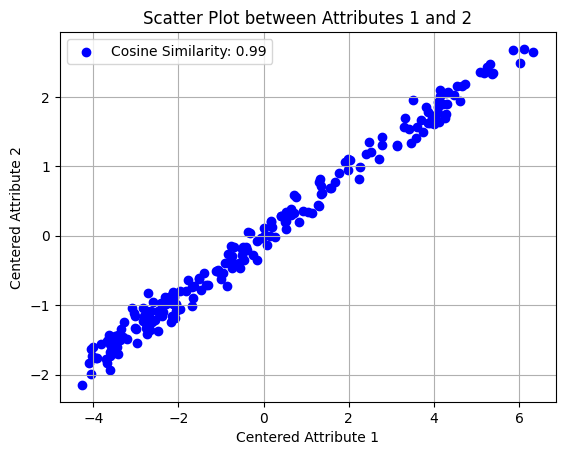

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'numpy_array' contains your dataset

# Step 1: Calculate the centered data matrix
centered_data = numpy_array - np.mean(numpy_array, axis=0)

# Step 2: Compute the centered attribute vectors for Attributes 1 and 2
centered_attribute1 = centered_data[:, 0]  # Attribute 1
centered_attribute2 = centered_data[:, 1]  # Attribute 2

# Step 3: Calculate the cosine similarity
cosine_similarity = np.dot(centered_attribute1, centered_attribute2) / (np.linalg.norm(centered_attribute1) * np.linalg.norm(centered_attribute2))

# Step 4: Plot a scatter plot
plt.scatter(centered_attribute1, centered_attribute2, marker='o', c='blue', label=f'Cosine Similarity: {cosine_similarity:.2f}')
plt.xlabel('Centered Attribute 1')
plt.ylabel('Centered Attribute 2')
plt.title('Scatter Plot between Attributes 1 and 2')
plt.legend()
plt.grid()
plt.show()
